### Visualizing Trending Topics in the News - Analysing News Sitemaps

In [119]:
# importing the necessary libraries
import advertools as adv
import numpy as np 
import pandas as pd 
import nltk
import matplotlib.pyplot as plt

#### 1. Take The News URLs From News Sitemap

In [2]:
df_guardian = adv.sitemap_to_df("http://www.theguardian.com/sitemaps/news.xml")
df_nyt = adv.sitemap_to_df("https://www.nytimes.com/sitemaps/new/news.xml.gz")
df_wp = adv.sitemap_to_df("https://www.washingtonpost.com/arcio/news-sitemap/")
df_bbc = adv.sitemap_to_df("https://www.bbc.com/sitemaps/https-index-com-news.xml")
df_dailymail = adv.sitemap_to_df("https://www.dailymail.co.uk/google-news-sitemap.xml")
df_skynews = adv.sitemap_to_df("https://news.sky.com/sitemap-index.xml")
df_cnn = adv.sitemap_to_df("https://edition.cnn.com/sitemaps/cnn/news.xml")

2022-07-11 13:16:35,308 | INFO | sitemaps.py:536 | sitemap_to_df | Getting http://www.theguardian.com/sitemaps/news.xml
2022-07-11 13:16:35,444 | INFO | sitemaps.py:536 | sitemap_to_df | Getting https://www.nytimes.com/sitemaps/new/news-1.xml.gz
2022-07-11 13:16:35,663 | INFO | sitemaps.py:536 | sitemap_to_df | Getting https://www.nytimes.com/sitemaps/new/news-2.xml.gz
2022-07-11 13:16:35,712 | INFO | sitemaps.py:536 | sitemap_to_df | Getting https://www.nytimes.com/sitemaps/new/news-3.xml.gz
2022-07-11 13:16:35,812 | INFO | sitemaps.py:536 | sitemap_to_df | Getting https://www.nytimes.com/sitemaps/new/news-4.xml.gz
2022-07-11 13:16:35,996 | INFO | sitemaps.py:536 | sitemap_to_df | Getting https://www.washingtonpost.com/arcio/news-sitemap/
2022-07-11 13:16:36,295 | INFO | sitemaps.py:536 | sitemap_to_df | Getting https://www.bbc.com/sitemaps/https-sitemap-com-news-3.xml
2022-07-11 13:16:36,318 | INFO | sitemaps.py:536 | sitemap_to_df | Getting https://www.bbc.com/sitemaps/https-sitemap

#### 2. Examine An Example News Sitemap With Python

In [120]:
df_bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   loc                    1397 non-null   object             
 1   lastmod                1397 non-null   datetime64[ns, UTC]
 2   news                   1397 non-null   object             
 3   news_publication       1397 non-null   object             
 4   publication_name       1397 non-null   object             
 5   publication_language   1397 non-null   object             
 6   news_publication_date  1397 non-null   object             
 7   news_title             1397 non-null   object             
 8   sitemap                1397 non-null   object             
 9   etag                   1397 non-null   object             
 10  sitemap_last_modified  1397 non-null   datetime64[ns, UTC]
 11  sitemap_size_mb        1397 non-null   float64          

In [4]:
df_bbc.columns

Index(['loc', 'lastmod', 'news', 'news_publication', 'publication_name',
       'publication_language', 'news_publication_date', 'news_title',
       'sitemap', 'etag', 'sitemap_last_modified', 'sitemap_size_mb',
       'download_date'],
      dtype='object')

#### 3. Find The Most Used Words In URLs From News Publications

In [122]:
df_dailymail["loc"].str.split("/").str[5].str.split("-").explode().value_counts().to_frame()

loc
article     241
reveals      30
daughter     29
new          26
Tory         24
...         ...
stepson       1
Warne.html    1
Maggie        1
Gyllenhaal    1
10997753      1

[4536 rows x 1 columns]

In [128]:
df_bbc["loc"].str.split("/").str[5].str.split("-").explode().value_counts().to_frame()

loc
svet           34
tennis         23
football       22
cricket         9
srbija          6
...           ...
62107679        1
62107651        1
62107644        1
62107630        1
c72egpqr4rqo    1

[465 rows x 1 columns]

#### 4. Find The Most Used Language In News Publications

In [129]:
df_bbc["publication_language"].head(20).value_counts().to_frame()

publication_language
en                        8
gu                        5
zh-tw                     2
mr                        2
ar                        2
cpe                       1

#### 5. Audit The News Titles For Frequency Of Words

In [9]:
df_bbc["news_title"].str.split(" ").explode().value_counts().to_frame()

news_title
to              136
in              123
-                91
for              68
:                58
...             ...
Pant              1
Kohli             1
Rohit,            1
removes           1
backlog           1

[9255 rows x 1 columns]

In [130]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_bbc_news_title_most_used_words = df_bbc["news_title"].str.split(" ").explode().value_counts().to_frame()
df_bbc_news_title_most_used_words 
pat = r'\b(?:{})\b'.format('|'.join(stop))
df_bbc_news_title_most_used_words.reset_index(drop=False, inplace=False)
df_bbc_news_title_most_used_words["words"] = df_bbc_news_title_most_used_words.index
df_bbc_news_title_most_used_words["without_stop_words"] = df_bbc_news_title_most_used_words["words"].str.replace(pat,"")
df_bbc_news_title_most_used_words.drop(df_bbc_news_title_most_used_words.loc[df_bbc_news_title_most_used_words["without_stop_words"]==""].index, inplace=True)
df_bbc_news_title_most_used_words

C:\Users\Farid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning:

The default value of regex will change from True to False in a future version.



news_title    words without_stop_words
-                91        -                  -
:                58        :                  :
v                47        v                  v
2022:            47    2022:              2022:
de               41       de                 de
...             ...      ...                ...
Pant              1     Pant               Pant
Kohli             1    Kohli              Kohli
Rohit,            1   Rohit,             Rohit,
removes           1  removes            removes
backlog           1  backlog            backlog

[9165 rows x 3 columns]

In [131]:
import string
df_bbc_news_title_most_used_words["without_stop_word_and_punctation"] = df_bbc_news_title_most_used_words['without_stop_words'].str.replace('[{}]'.format(string.punctuation), '')
df_bbc_news_title_most_used_words.drop(df_bbc_news_title_most_used_words.loc[df_bbc_news_title_most_used_words["without_stop_word_and_punctation"]==""].index, inplace=True)
df_bbc_news_title_most_used_words.drop(["without_stop_words", "words"], axis=1, inplace=True)
df_bbc_news_title_most_used_words

C:\Users\Farid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



news_title without_stop_word_and_punctation
v                47                                v
2022:            47                             2022
de               41                               de
Sri              38                              Sri
Euro             34                             Euro
...             ...                              ...
Pant              1                             Pant
Kohli             1                            Kohli
Rohit,            1                            Rohit
removes           1                          removes
backlog           1                          backlog

[9136 rows x 2 columns]

In [132]:
df_bbc_news_title_most_used_words["news_title"].to_frame() 

news_title
v                47
2022:            47
de               41
Sri              38
Euro             34
...             ...
Pant              1
Kohli             1
Rohit,            1
removes           1
backlog           1

[9136 rows x 1 columns]

In [133]:
adv.word_frequency(df_bbc["news_title"],phrase_len=2, rm_words=adv.stopwords.keys())

word  abs_freq
0             sri lanka        36
1             euro 2022        34
2        wimbledon 2022        15
3          nick kyrgios        15
4            live watch        14
...                 ...       ...
11984      security was         1
11985        was flawed         1
11986      flawed japan         1
11987      japan police         1
11988  reducing backlog         1

[11989 rows x 2 columns]

In [135]:
import plotly.express as px

In [137]:
df_bbc_news_title_most_used_words.head()

news_title without_stop_word_and_punctation
without_stop_word_and_punctation                                             
v                                         47                                v
2022                                      47                             2022
de                                        41                               de
Sri                                       38                              Sri
Euro                                      34                             Euro

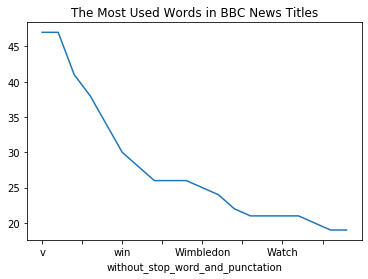

In [136]:
df_bbc_news_title_most_used_words["news_title"] = df_bbc_news_title_most_used_words["news_title"].astype(int)
df_bbc_news_title_most_used_words["without_stop_word_and_punctation"] = df_bbc_news_title_most_used_words["without_stop_word_and_punctation"].astype(str)
df_bbc_news_title_most_used_words.index = df_bbc_news_title_most_used_words["without_stop_word_and_punctation"]
df_bbc_news_title_most_used_words["news_title"].head(20).plot(title="The Most Used Words in BBC News Titles")

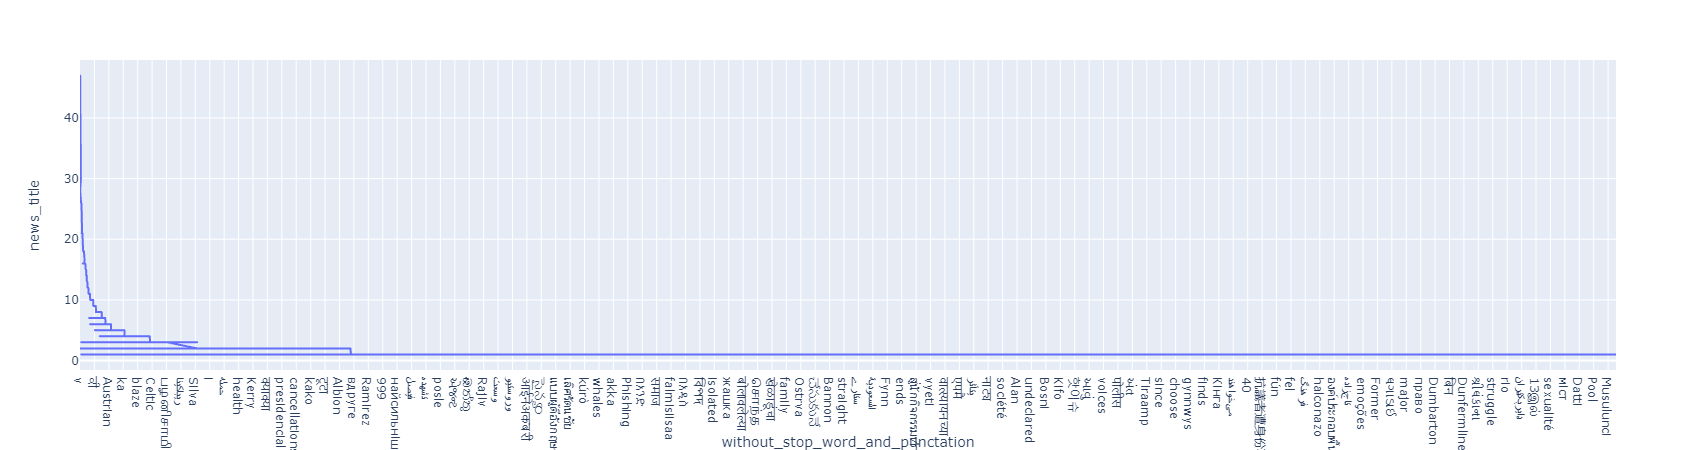

In [138]:
fig = px.line(df_bbc_news_title_most_used_words, x="without_stop_word_and_punctation", y="news_title")
fig.show()

In [139]:
df_bbc_news_title_most_used_words.drop("without_stop_word_and_punctation", axis=1, inplace=True)

In [151]:
df_bbc_news_title_most_used_words_1 = df_bbc_news_title_most_used_words.drop_duplicates().groupby('without_stop_word_and_punctation', sort=False).sum()
df_bbc_news_title_most_used_words_1 = df_bbc_news_title_most_used_words_1.reset_index()

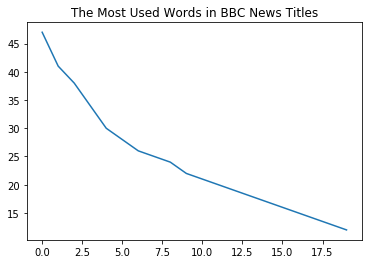

In [152]:
df_bbc_news_title_most_used_words_1["news_title"].head(20).plot(title="The Most Used Words in BBC News Titles")

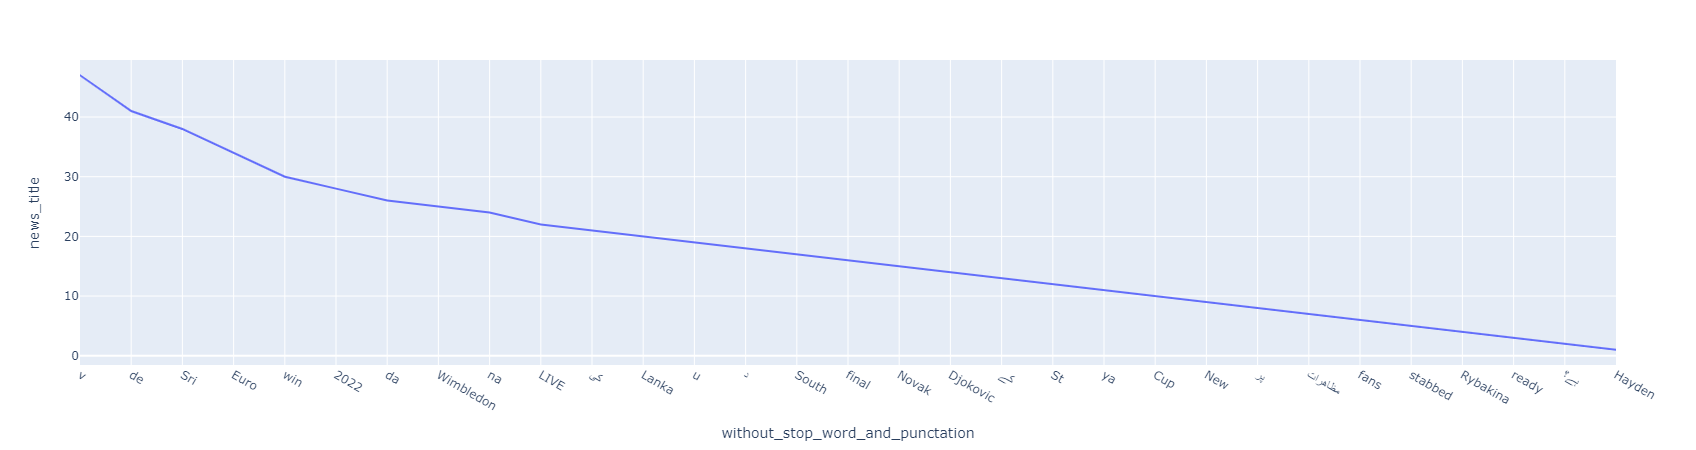

In [153]:
fig = px.line(df_bbc_news_title_most_used_words_1, x="without_stop_word_and_punctation", y="news_title")
fig.show()

In [33]:
import nltk
from l
import unicodedata
import re

In [34]:
def text_clean(content):
    lemmetizer = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    content = (unicodedata.normalize('NFKD', content).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', content).split()
    return [lemmetizer.lemmatize(word) for word in words if word not in stopwords]

In [35]:
raw_words = text_clean(''.join(str(df_bbc['news_title'].tolist())))

In [36]:
raw_words[:10]

['boris',
 'johnson',
 'resignation',
 'happens',
 'oneminute',
 'world',
 'news',
 'bbc',
 '1200',
 'uk']

In [37]:
pd.set_option("display.max_colwidth",90)

bbc_bigrams = (pd.Series(ngrams(raw_words, n = 2)).value_counts())[:15].sort_values(ascending=False).to_frame()

bbc_trigrams = (pd.Series(ngrams(raw_words, n = 3)).value_counts())[:15].sort_values(ascending=False).to_frame()

In [62]:
bbc_trigrams.head()

0
(2022, live, watch)          14
(england, v, india)          11
(score, commentary, update)   9
(wimbledon, 2022, live)       8
(austrian, grand, prix)       6

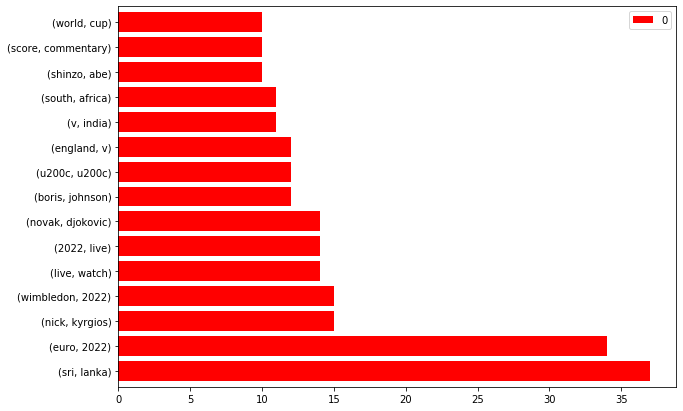

In [39]:
bbc_bigrams.plot.barh(color="red", width=.8,figsize=(10 , 7))

In [ ]:
bbc_bigrams = (pd.Series(ngrams(raw_words, n = 2)).value_counts())[:15].sort_values(ascending=False).to_frame()

In [80]:
def extract_n_grams(text,ngram=1):
  words=[word for word in text if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [85]:
#extract_n_grams(df_dailymail["news_title"])

In [73]:
def ngram_visualize(dataframe:pd.DataFrame, color:str="blue") -> pd.DataFrame.plot:
     dataframe.plot.barh(color=color, width=.8,figsize=(10 ,7))
#ngram_visualize(extract_n_grams(df_dailymail["news_title"]))

In [86]:
def ngram_visualize(dataframe:pd.DataFrame, color:str="blue") -> pd.DataFrame.plot:
    dataframe.plot.barh(color=color, width=.8,figsize=(10 ,7))

In [87]:
def ngram_visualize(dataframe:pd.DataFrame, backend:str, color:str="blue", ) -> pd.DataFrame.plot:
    if backend=="plotly":
        pd.options.plotting.backend=backend
        return dataframe.plot.bar()
    else:
        return dataframe.plot.barh(color=color, width=.8,figsize=(10 ,7))

In [88]:
def text_clean(content):
    lemmetizer = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    content = (unicodedata.normalize('NFKD', content).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', content).split()
    return [lemmetizer.lemmatize(word) for word in words if word not in stopwords]

In [89]:
def extract_n_grams(dataframe:pd.DataFrame|pd.Series):
    if "news_title" in dataframe.columns:
        return dataframe_extract_n_grams(dataframe,  ngram=3, first=10)

TypeError: unsupported operand type(s) for |: 'type' and 'type'

In [90]:
def dataframe_extract_n_grams(dataframe:pd.DataFrame|pd.Series, ngram:int, first:int):
    raw_words = text_clean(''.join(str(dataframe['news_title'].tolist())))
    return (pd.Series(ngrams(raw_words, n = ngram)).value_counts())[:first].sort_values(ascending=False).to_frame()

TypeError: unsupported operand type(s) for |: 'type' and 'type'

In [109]:
df1_raw_words = text_clean(''.join(str(df_bbc['news_title'].tolist())))
df2_raw_words = text_clean(''.join(str(df_guardian['news_title'].tolist())))

In [116]:
def ngram_df_constructor(df_1:pd.DataFrame, df_2:pd.DataFrame):
    df_1_bigrams = (pd.Series(ngrams(df1_raw_words, n = 2)).value_counts()).sort_values(ascending=False).to_frame()
    df_1_trigrams = (pd.Series(ngrams(df1_raw_words, n = 3)).value_counts()).sort_values(ascending=False).to_frame()
    df_2_bigrams = (pd.Series(ngrams(df2_raw_words, n = 2)).value_counts()).sort_values(ascending=False).to_frame()
    df_2_trigrams = (pd.Series(ngrams(df2_raw_words, n = 3)).value_counts()).sort_values(ascending=False).to_frame()
    ngrams_df = {
        "df_1_bigrams":df_1_bigrams.index,
        "df_1_trigrams": df_1_trigrams.index,
        "df_2_bigrams":df_2_bigrams.index,
        "df_2_trigrams": df_2_trigrams.index,
    }
    dict_df = (pd.DataFrame({ key:pd.Series(value) for key, value in ngrams_df.items() }).reset_index(drop=True)
               .rename(columns={"df_1_bigrams":adv.url_to_df(df_1["loc"])["netloc"][1].split("www.")[1].split(".")[0] + "_bigrams",
                                "df_1_trigrams":adv.url_to_df(df_1["loc"])["netloc"][1].split("www.")[1].split(".")[0] + "_trigrams",
                                "df_2_bigrams": adv.url_to_df(df_2["loc"])["netloc"][1].split("www.")[1].split(".")[0] + "_bigrams",
                                "df_2_trigrams": adv.url_to_df(df_2["loc"])["netloc"][1].split("www.")[1].split(".")[0] + "_trigrams"}))
    return dict_df

In [46]:
df_guardian["news_keywords"].str.split().explode().value_counts().to_frame().rename(columns={"news_keywords":"news_keyword_occurence"})

news_keyword_occurence
news,                              171
and                                127
UK                                 116
Australia                          103
news                                99
...                                ...
morning                              1
cricket,                             1
Corrections                          1
clarifications                       1
media                                1

[1294 rows x 1 columns]

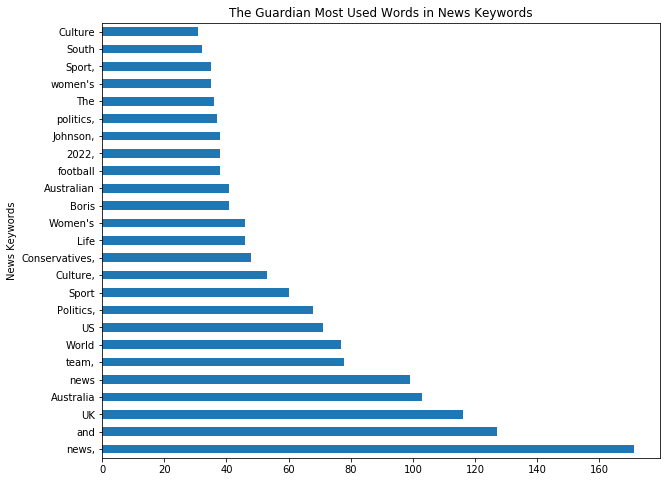

In [47]:
(df_guardian["news_keywords"].str.split(expand=True).stack().value_counts()

.to_frame().rename(columns={"news_keywords":"news_keyword_occurence"})

.head(25).plot.barh(figsize=(10,8),

title="The Guardian Most Used Words in News Keywords", xlabel="News Keywords",

legend=False, ylabel="Count of News Keyword"))


In [48]:
df_guardian["news_keywords"].str.split(",").explode().value_counts().to_frame().rename(columns={"news_keywords":"news_keyword_occurence"})

news_keyword_occurence
 UK news                                  99
 Sport                                    94
 Culture                                  83
 World news                               70
 Politics                                 64
...                                      ...
 Hull FC                                   1
Joe Biden                                  1
 Mohammed bin Salman                       1
 Saudi Arabia                              1
 Women in politics                         1

[997 rows x 1 columns]

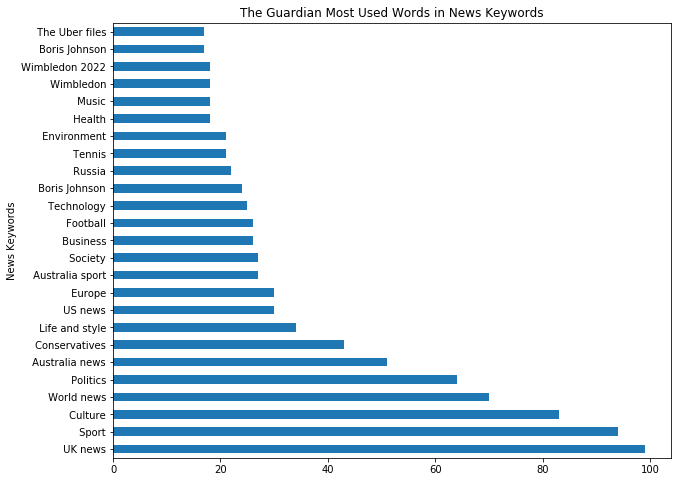

In [49]:
(df_guardian["news_keywords"].str.split(",").explode().value_counts().to_frame().rename(columns={"news_keywords":"news_keyword_occurence"}).head(25).plot.barh(figsize=(10,8),
title="The Guardian Most Used Words in News Keywords", xlabel="News Keywords",
legend=False, ylabel="Count of News Keyword"))

In [53]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

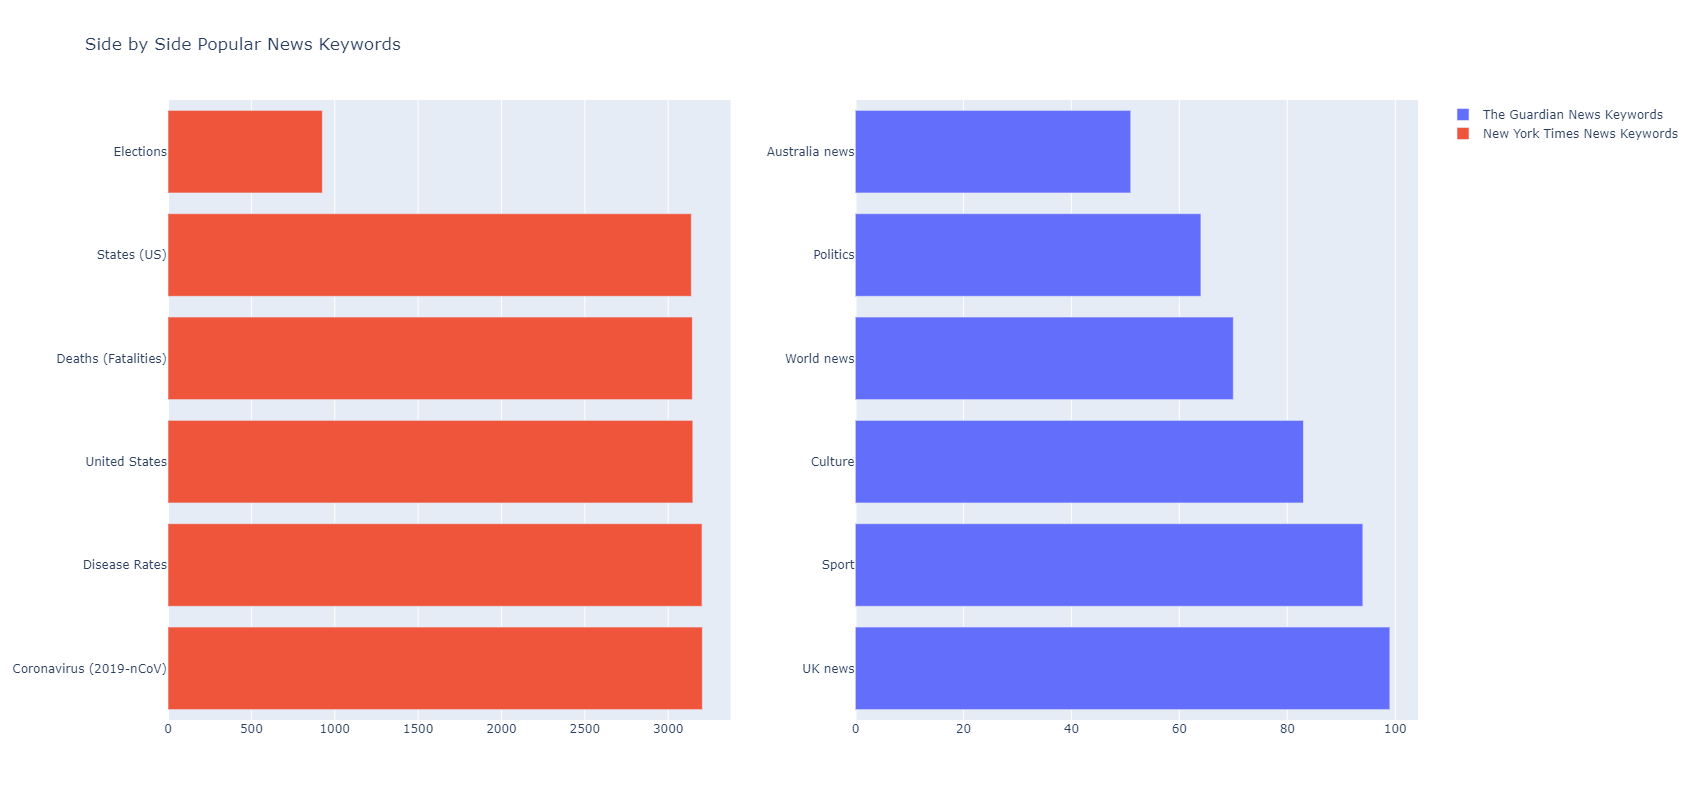

In [54]:
df_1 = df_guardian["news_keywords"].str.split(",").explode().value_counts().to_frame().rename(columns={"news_keywords":"news_keyword_occurence"})

df_2 = df_nyt["news_keywords"].str.split(",").explode().value_counts().to_frame().rename(columns={"news_keywords":"news_keyword_occurence"})

fig = make_subplots(rows = 1, cols = 2)

fig.add_trace(

     go.Bar(y = df_1["news_keyword_occurence"][:6].index, x = df_1["news_keyword_occurence"], orientation="h", name="The Guardian News Keywords"), row=1, col=2

)

fig.add_trace(

     go.Bar(y = df_2["news_keyword_occurence"][:6].index, x = df_2["news_keyword_occurence"], orientation="h", name="New York Times News Keywords"), row=1, col=1

)

fig.update_layout(height = 800, width = 1200, title_text="Side by Side Popular News Keywords")

fig.show()

fig.write_html("news_keywords.html")

In [117]:
def extract_n_grams(text,ngram=1):
  words=[word for word in text if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [221]:
bbc_raw_words = text_clean(''.join(str(df_bbc['news_title'].tolist())))
bbc_trigrams = (pd.Series(ngrams(bbc_raw_words, n = 3)).value_counts()).sort_values(ascending=False).to_frame()

In [222]:
sky_raw_words = text_clean(''.join(str(df_skynews['news_title'].tolist())))
sky_trigrams = (pd.Series(ngrams(sky_raw_words, n = 3)).value_counts()).sort_values(ascending=False).to_frame()

In [223]:
daily_mail_raw_words = text_clean(''.join(str(df_dailymail['news_title'].tolist())))
daily_mail_trigrams = (pd.Series(ngrams(daily_mail_raw_words , n = 3)).value_counts()).sort_values(ascending=False).to_frame()

In [224]:
guardian_raw_words = text_clean(''.join(str(df_guardian['news_title'].tolist())))
guardian_trigrams = (pd.Series(ngrams(guardian_raw_words, n = 3)).value_counts()).sort_values(ascending=False).to_frame()

In [225]:
nyt_raw_words = text_clean(''.join(str(df_nyt['news_title'].tolist())))
nyt_trigrams = (pd.Series(ngrams(nyt_raw_words, n = 3)).value_counts()).sort_values(ascending=False).to_frame()

In [226]:
cnn_raw_words = text_clean(''.join(str(df_cnn['news_title'].tolist())))
cnn_trigrams = (pd.Series(ngrams(cnn_raw_words, n = 3)).value_counts()).sort_values(ascending=False).to_frame()

In [ ]:

df1 = bbc_trigrams 
df2 = sky_trigrams
df3 = daily_mail_trigrams
df4 = guardian_trigrams 
df5 = nyt_trigrams
df6 = cnn_trigrams


In [234]:
df1 = df1.reset_index()
df2 = df2.reset_index()
df3 = df3.reset_index()
df4 = df4.reset_index()
df5 = df5.reset_index()
df6 = df6.reset_index()


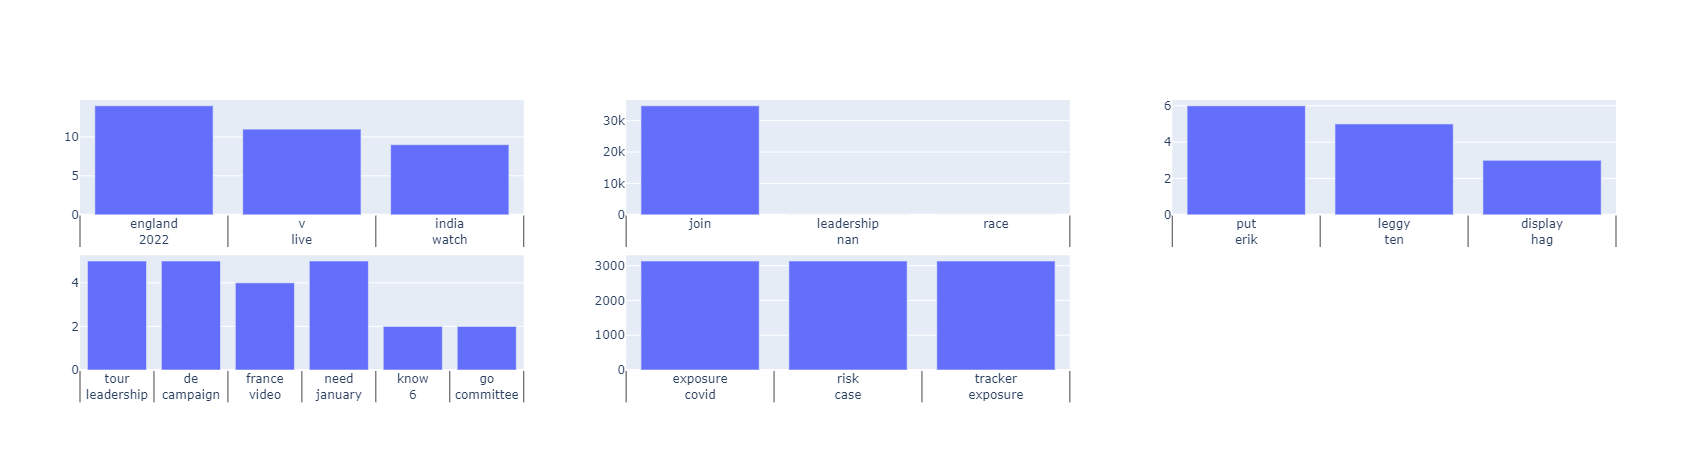

In [247]:


fig1 = px.bar_polar(df1,x='index', y=0)
fig2 = px.bar(df2,x='index', y=0)
fig3 = px.bar(df3,x='index', y=0)
fig4 = px.bar(df4,x='index', y=0)
fig5 = px.bar(df5,x='index', y=0)
fig6 = px.bar(df6,x='index', y=0)

fig = make_subplots(rows=2, cols=3)

fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig3['data'][0], row=1, col=3)
fig.add_trace(fig4['data'][0], row=2, col=1)
fig.add_trace(fig5['data'][0], row=2, col=2)
fig.add_trace(fig6['data'][0], row=2, col=1)

fig.show()